
## **A model for predicting fraudulent transactions for a financial company**



### Importing neccessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [ ]:
df = pd.read_csv('/content/Fraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.00,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.00,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.00,0.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.00,0.00


In [ ]:
df.shape

(655045, 11)

## **Data cleaning**

### Droping duplicates values

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(655045, 11)

### No duplicates values found

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655045 entries, 0 to 655044
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            655045 non-null  int64  
 1   type            655045 non-null  object 
 2   amount          655045 non-null  float64
 3   nameOrig        655045 non-null  object 
 4   oldbalanceOrg   655045 non-null  float64
 5   newbalanceOrig  655045 non-null  float64
 6   nameDest        655045 non-null  object 
 7   oldbalanceDest  655044 non-null  float64
 8   newbalanceDest  655044 non-null  float64
 9   isFraud         655044 non-null  float64
 10  isFlaggedFraud  655044 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 60.0+ MB


In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(655044, 11)

In [ ]:
df['type'].value_counts()

CASH_OUT    232784
PAYMENT     221037
CASH_IN     142721
TRANSFER     53662
DEBIT         4840
Name: type, dtype: int64

In [ ]:
fraud_count = df['isFraud'].value_counts()
fraud_count

0.00    654646
1.00       398
Name: isFraud, dtype: int64

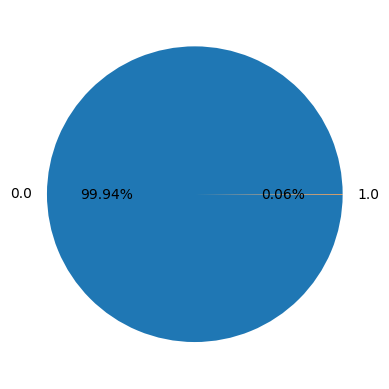

In [ ]:
plt.pie(fraud_count,labels=fraud_count.keys(),autopct='%.2f%%');

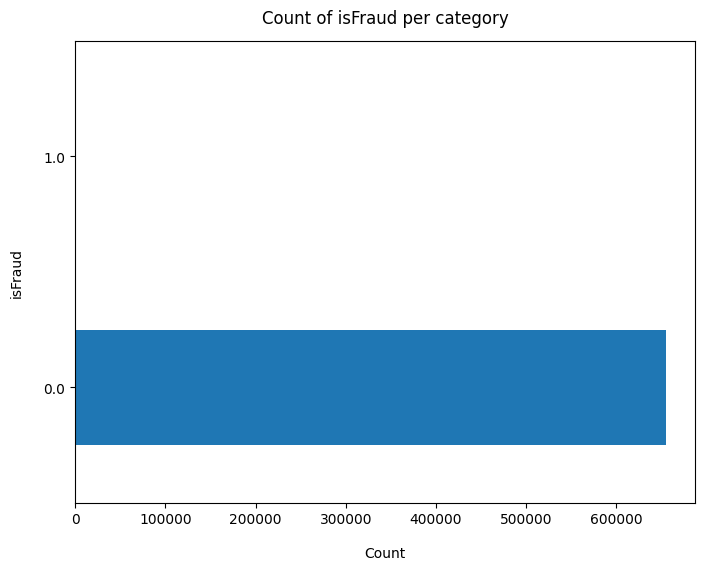

In [ ]:
fraud_count.plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("isFraud", labelpad=14)
plt.title("Count of isFraud per category",y=1.02);

Number of unique values from each column

In [ ]:
df.nunique()

step                  35
type                   5
amount            639825
nameOrig          654947
oldbalanceOrg     285937
newbalanceOrig    296014
nameDest          283011
oldbalanceDest    378342
newbalanceDest    236442
isFraud                2
isFlaggedFraud         1
dtype: int64

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,655044.00,655044.00,655044.00,655044.00,655044.00,655044.00,655044.00,655044.00
mean,17.16,162666.68,886118.77,906218.54,976741.49,1137646.75,0.00,0.00
std,7.41,271555.03,2955017.16,2992072.52,2319012.10,2471123.36,0.02,0.00
min,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.00,12535.84,0.00,0.00,0.00,0.00,0.00,0.00
50%,16.00,76849.99,17350.00,0.00,116113.33,210366.35,0.00,0.00
75%,19.00,216780.24,153856.09,193802.37,896951.31,1173687.72,0.00,0.00
max,35.00,10000000.00,38939424.03,38946233.02,41482697.12,41482697.12,1.00,0.00


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,655044.00,655044.00,655044.00,655044.00,655044.00,655044.00,655044.00,655044.00
mean,17.16,162666.68,886118.77,906218.54,976741.49,1137646.75,0.00,0.00
std,7.41,271555.03,2955017.16,2992072.52,2319012.10,2471123.36,0.02,0.00
min,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.00,12535.84,0.00,0.00,0.00,0.00,0.00,0.00
50%,16.00,76849.99,17350.00,0.00,116113.33,210366.35,0.00,0.00
75%,19.00,216780.24,153856.09,193802.37,896951.31,1173687.72,0.00,0.00
max,35.00,10000000.00,38939424.03,38946233.02,41482697.12,41482697.12,1.00,0.00


In [ ]:
df.describe(include='object')

,type,nameOrig,nameDest
count,655044,655044,655044
unique,5,654947,283011
top,CASH_OUT,C1279045948,C985934102
freq,232784,2,95


In [ ]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,-0.01,-0.01,-0.01,0.01,-0.01,0.00,NaN
amount,-0.01,1.00,-0.00,-0.01,0.22,0.32,0.07,NaN
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.09,0.06,0.00,NaN
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.10,0.06,-0.01,NaN
oldbalanceDest,0.01,0.22,0.09,0.10,1.00,0.97,-0.01,NaN
newbalanceDest,-0.01,0.32,0.06,0.06,0.97,1.00,-0.00,NaN
isFraud,0.00,0.07,0.00,-0.01,-0.01,-0.00,1.00,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

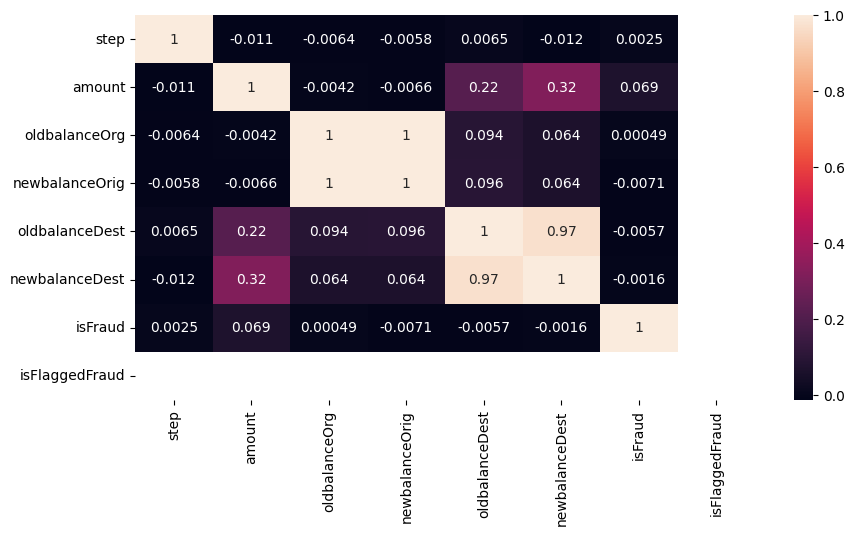

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

## **Feature Engineering**

In [ ]:
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,78224,170136.00,160296.36,173941,0.00,0.00,0.00,0.00
1,1,3,1864.28,225583,21249.00,19384.72,181300,0.00,0.00,0.00,0.00
2,1,4,181.00,103120,181.00,0.00,47461,0.00,0.00,1.00,0.00
3,1,1,181.00,600872,181.00,0.00,42257,21182.00,0.00,1.00,0.00
4,1,3,11668.14,354497,41554.00,29885.86,88145,0.00,0.00,0.00,0.00


In [ ]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']
y.value_counts()

0.00    654646
1.00       398
Name: isFraud, dtype: int64

This dataset is unbalanced. Therefore we will use SMOTE

In [ ]:
over_sample = SMOTE(random_state=0)
x,y = over_sample.fit_resample(x,y)
y.value_counts()

0.00    654646
1.00    654646
Name: isFraud, dtype: int64

Now the dataset is balanced

## **Feature Scaling**

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### Split the data into train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=0)

### Apply Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test)

### Performance of the model

In [ ]:
confusion_matrix(y_test,y_pred)

array([[165529,  30824],
       [ 26900, 169535]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8530403169139587

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85    196353
         1.0       0.85      0.86      0.85    196435

    accuracy                           0.85    392788
   macro avg       0.85      0.85      0.85    392788
weighted avg       0.85      0.85      0.85    392788



### Accuracy using cross validation

In [ ]:
cvs = cross_val_score(log_reg,x,y,cv=3)

In [ ]:
print(cvs)
print(cvs.mean())

[0.79939097 0.84587025 0.76239947]
0.8025535631821666


### Apply Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
pred = clf.predict(x_test)
accuracy_score(y_test,pred)

0.9219579009542043

In [ ]:
print(classification_report(y_test, pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92    196353
           1       0.88      0.98      0.93    196435

    accuracy                           0.92    392788
   macro avg       0.93      0.92      0.92    392788
weighted avg       0.93      0.92      0.92    392788



## **Feature Selection**

In [ ]:
chi_best_col = SelectKBest(chi2,k=8)
kbest = chi_best_col.fit_transform(x,y)
np.array(df.drop(columns=['isFraud']).columns)[chi_best_col.get_support()]

array(['step', 'type', 'amount', 'nameOrig', 'newbalanceOrig', 'nameDest',
       'oldbalanceDest', 'newbalanceDest'], dtype=object)

In [ ]:
pd.DataFrame(list(zip(df.drop(columns=['isFraud']).columns,chi_best_col.scores_)),columns=['features','scores']).sort_values(by='scores',ascending=False)

,features,scores
6,nameDest,44027.92
2,amount,33433.49
1,type,18084.35
5,newbalanceOrig,14059.63
7,oldbalanceDest,3246.56
8,newbalanceDest,275.90
0,step,145.65
3,nameOrig,13.38
4,oldbalanceOrg,6.43
9,isFlaggedFraud,NaN


### Applying Logistic Regression by using 8 important Features

In [ ]:
x1 = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y1 = df['isFraud']

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.30,random_state=0)

In [ ]:
log_reg1 = LogisticRegression()
log_reg1.fit(x1_train,y1_train)

LogisticRegression()

In [ ]:
y2_pred = log_reg1.predict(x1_test)

In [ ]:
print(classification_report(y1_test,y2_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    196388
         1.0       0.55      0.22      0.32       126

    accuracy                           1.00    196514
   macro avg       0.77      0.61      0.66    196514
weighted avg       1.00      1.00      1.00    196514



In [ ]:
cvs1 = cross_val_score(log_reg1,x1,y1,cv=3)

In [ ]:
print(cvs1)
print(cvs1.mean())

[0.99921227 0.99955576 0.99946416]
0.9994107266076783


## **Model accuracy is 99%**

1. Data cleaning including missing values, outliers and multi-collinearity.

This dataset contains no missing values. I droped the rows with null values and used chi2 and SelectKBest for feature selection.

2. Describe your fraud detection model in elaboration.

This question will be answered by combining the answers of all the following questions.

3. How did you select variables to be included in the model?

I used chi2 and SelectKBest for feature selection.

chi2 is a statistical test used to determine the independence of two categorical variables. It measures the relationship between two categorical variables by comparing the observed frequencies of their occurrences to the frequencies that would be expected if the variables were independent. The test returns two arrays: one containing the chi-squared test statistic, and the other containing the p-values associated with each feature.

SelectKBest is a feature selection method that selects the top k features based on their performance in a specified scoring function. It allows you to choose the best k features, where "best" is defined by the scoring function you provide.

4. Demonstrate the performance of the model by using best set of tools.

I have used various metrics to demonstrate the performance of the model, as accuracy is not a good metric for imbalanced dataset. I have used classification reports which provide precision,recall anf F1 score(recommended for imbalanced dataset).

5. What are the key factors that predict fraudulent customer?

The key factors that predict fraudulent customer are as under:
step, type, amount, oldbalanceOrg, newbalanceOrig,nameDest, oldbalanceDest and  isFlaggedFraud.

6. Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense because of their kbest scores as shown above.

7. What kind of prevention should be adopted while company update its infrastructure?

The company should contact the account holder as soon as the transaction amount crosses 30% of their balance in account and should not let them totally empty their account, by that they can significantly decrease fraudlent transaction.

8. Assuming these actions have been implemented, how would you determine if they work?

To check the efficiency of the above step, the company should first check the number of fraudlent transactions. Then they should run a model like this and check the feature importance. If the feature importance of the features which were considered during decision making decreases, it means that the feature did its work and rest of the fraudlent transactions have no significant relationship with these features. Therefore they can check the other features and take the appropriate steps accordinly.